In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
import shutil
import cv2
pd.set_option('display.max_columns', None)


Datos de las imágenes completas ZT filtradas y sin duplicados:

In [2]:
data = pd.read_csv("dataset_filtrado_ZT_info_limpio.csv")
data

,Codigo_Local_Operacion,Codigo_Equipo,Codigo_INMETRO,Fecha_Comprobacion_INMETRO,Codigo_OVD,Fecha_Comprobacion_OVD,Pista,Fecha_Paso_Vehicular,Hora_Paso_Vehicular,Secuencial_Imagen,Velocidad_Maxima,Velocidad_Maxima_Tolerada,Velocidad_Medida,Velocidad_Considerada,Tamaño_Vehiculo,Placa_Vehiculo,Tipo_Imagen,Tiempo_Ocupacion,Distancia_Vehiculo_Anterior,Cantidad_Ejes_Vehiculo,Codigo_Clasificacion_Vehiculo,Secuencial_Infraccion,Codigo_Infraccion_Vehiculo,Tiempo_Caracterizar_Inicio_Semaforo_Rojo,Tiempo_Avance_Rojo_Parada_Cebra,Tiempo_Caracterizar_Parada_Cebra,Tiempo_Parada_Vehiculo_Cebra,Path_Imagen
0,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52518,416646,60,66,39,35,168,DRT64D,ZT,468,1544,NaN,1,184851,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
1,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52849,416650,60,66,38,34,129,IBN25E,ZT,484,896,NaN,1,184853,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
2,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52853,416654,60,66,37,33,122,EJH95C,ZT,468,571,NaN,1,184855,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
3,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,52856,416658,60,66,31,28,297,HON76E,ZT,780,1447,NaN,2,184857,30004,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
4,60,VLS-S0173,M3982023,1012011,M3982023,1012011,1,20240903,53305,416668,60,66,28,25,404,ITR241,ZT,1092,1619,NaN,2,184862,30003,1,0,10,00.jpg,20240903\60_VLS-S0173_M3982023_01012011_M39820...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,140613,326875,60,66,21,14,360,TSK762,ZT,1435,3752,NaN,2,117303,57462,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...
517,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,142345,326879,60,66,24,17,862,GKV390,ZT,2184,3950,NaN,3,117305,57462,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...
518,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,144505,326883,60,66,15,8,416,SMI313,ZT,2356,1062,NaN,2,117307,30003,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...
519,7,VLS-S0173,0123,1122010,0123,27082013,2,20240909,150119,326893,60,66,18,11,703,HIV019,ZT,2324,5194,NaN,3,117312,30003,1,0,10,00.jpg,20240909\7_VLS-S0173_0123_01122010_0123_270820...


Imágenes recortadas por modelo faster rcnn inception resnet:

In [3]:
### Guardar los paths de las imagenes recortadas de las placas 

imagenes_placas = []
image_directory = "dataset_filtrado_ZT"

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") and "placa_recortada" in filename:  
        image_path = os.path.join(image_directory, filename)
        imagenes_placas.append(image_path)

        

In [4]:
len(imagenes_placas)

426

In [31]:
## Agregar columna en el archivo .csv con path de las imagenes de placas recortadas

data['Path_Placa'] = ""

for i in range(len(imagenes_placas)):
    
    nombre_placa = os.path.splitext(os.path.basename(imagenes_placas[i]))[0]
    # Eliminar el sufijo "_placa_recortada" del nombre de la placa recortada
    nombre_placa_base = nombre_placa.replace("_placa_recortada", "")
    
    for j in range(len(data)):
        nombre_ZT = os.path.splitext(os.path.basename(data['Path_Imagen'][j]))[0]
        
        # Si los nombres coinciden, asignar el path de la imagen de la placa recortada
        if nombre_placa_base == nombre_ZT:
            data.loc[j, 'Path_Placa'] = imagenes_placas[i]
            break  

In [65]:
data['Path_Placa']

0                                                       
1                                                       
2      dataset_filtrado_ZT\60_VLS-S0173_M3982023_0101...
3                                                       
4                                                       
                             ...                        
516                                                     
517    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
518    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
519    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
520    dataset_filtrado_ZT\7_VLS-S0173_0123_01122010_...
Name: Path_Placa, Length: 521, dtype: object

'BIP668'

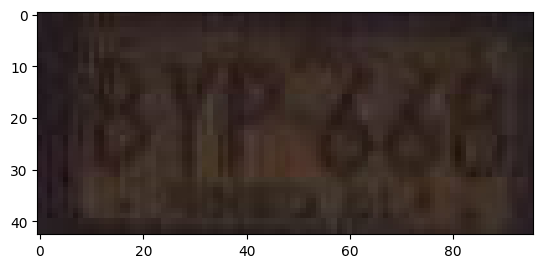

In [69]:
#Lectura de imagen de prueba
img = mpimg.imread(data['Path_Placa'][340])
imgplot = plt.imshow(img) 

data['Placa_Vehiculo'][340]

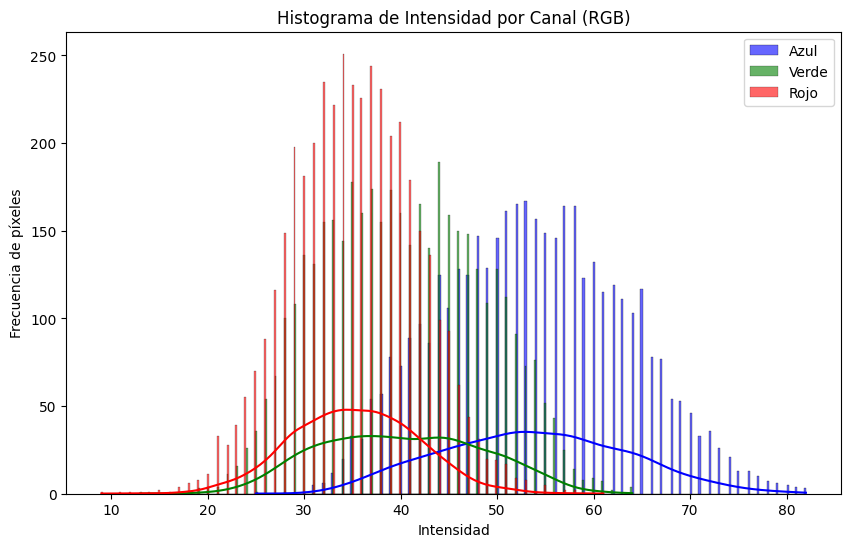

In [48]:
b, g, r = cv2.split(img)

plt.figure(figsize=(10, 6))

#diferentes canales
sns.histplot(b.ravel(), bins=256, kde=True, color='blue', label='Azul', alpha=0.6)
sns.histplot(g.ravel(), bins=256, kde=True, color='green', label='Verde', alpha=0.6)
sns.histplot(r.ravel(), bins=256, kde=True, color='red', label='Rojo', alpha=0.6)

plt.title('Histograma de Intensidad por Canal (RGB)')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia de píxeles')
plt.legend()
plt.show()

Dado que las imágenes tienen 3 canales de color, es más útil un análisis de un solo canal promedidado, es decir, un canal en escala de grises

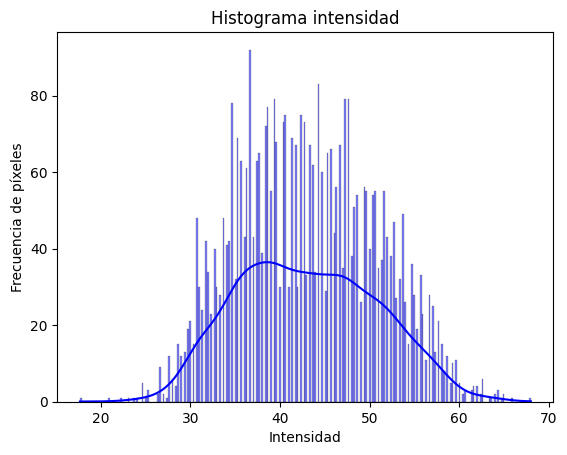

In [49]:
## Promediar los tres canales de color 
if img.ndim == 3:
    img = img.mean(axis=2)

#Histograma intensidad de pixeles
sns.histplot(img.ravel(), bins=256, kde=True, color='blue')
plt.title('Histograma intensidad')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia de píxeles')
plt.show()

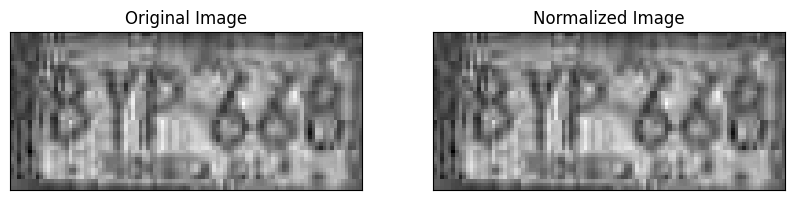

In [50]:
# Valores para la normalización 
min_value = 0
max_value = 1

normalized_image = cv2.normalize(img.astype('float32'), None, min_value, max_value, cv2.NORM_MINMAX)

## Graficando la comparación luego de normalizar 
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.xticks([]), plt.yticks([])

plt.show()


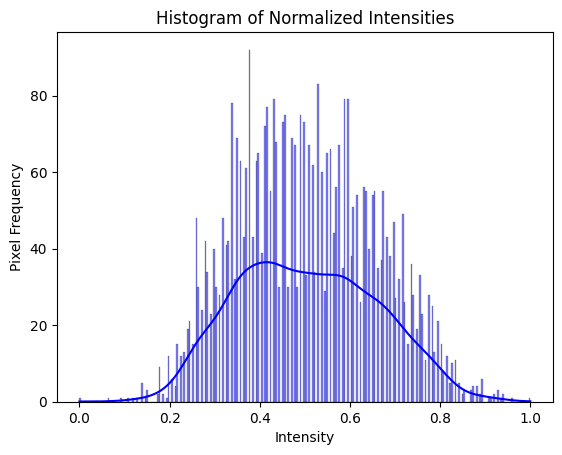

In [51]:
### Histograma de intensidades 
sns.histplot(normalized_image.ravel(), bins=256, kde=True, color='blue')
plt.title('Histogram of Normalized Intensities')
plt.xlabel('Intensity')
plt.ylabel('Pixel Frequency')
plt.show()

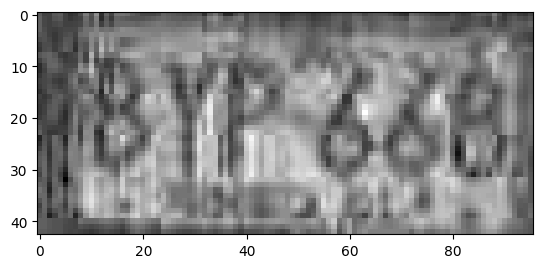

In [53]:
plt.imshow(normalized_image, cmap ='gray')

In [59]:
### función para implementar normalización a todas las imágenes 

def normalizacion(path_img, min_val, max_val):
    
    imagen = mpimg.imread(path_img)
    
    #Promedio canales si la imagen es RGB
    if imagen.ndim == 3:
        imagen = imagen.mean(axis=2) 

    normalizada = cv2.normalize(imagen.astype('float32'), None, min_val, max_val, cv2.NORM_MINMAX)
    return normalizada


In [62]:
def crear_histograma(img_normalizada, path_img, carpeta_histogramas):
    nombre_base = os.path.splitext(os.path.basename(path_img))[0]  # Obtener nombre base sin extensión
    plt.figure()
    sns.histplot(img_normalizada.ravel(), bins=256, kde=True, color='blue')
    plt.title(f'Histograma normalizado de {nombre_base}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia de píxeles')
    
    nombre_histograma = f'{nombre_base}_histograma_normalizado.png'
    ruta_histograma = os.path.join(carpeta_histogramas, nombre_histograma)
    plt.savefig(ruta_histograma)
    plt.close()

# Función para generar el video con los histogramas
def generar_video_histogramas(carpeta_histogramas, output_video, fps=2):
    imagenes_histogramas = sorted([os.path.join(carpeta_histogramas, img) for img in os.listdir(carpeta_histogramas) if img.endswith(".png")])

    # Leer la primera imagen para obtener el tamaño del video
    frame = cv2.imread(imagenes_histogramas[0])
    height, width, _ = frame.shape

    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for img_path in imagenes_histogramas:
        frame = cv2.imread(img_path)
        video_writer.write(frame)
    
    video_writer.release()



In [63]:
#Crear la carpeta para guardar los histogramas
carpeta_histogramas = 'dataset_filtrado_ZT/histogramas_normalizados'
os.makedirs(carpeta_histogramas, exist_ok=True)

In [74]:
## Generando imagenes normalizadas e histogramas
for path_img in data['Path_Placa']:  
    if path_img == "":
        # Saltar si el path está vacio
        print(f"Imagen sin placa recortada.")
        continue
    imagen_normalizada = normalizacion(path_img, min_val=0, max_val=1)
    crear_histograma(imagen_normalizada, path_img, carpeta_histogramas) # Guardar histograms


# Generar el video de los histogramas
generar_video_histogramas(carpeta_histogramas, output_video='histogramas_video.mp4', fps=2)


Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa recortada.
Imagen sin placa rec